# Datová akademie, ČSOB, 2023

---

* [Agregace v NUMPY](#Agregace-v-NUMPY),
* [Broadcasting v NUMPY](#Broadcasting-v-NUMPY),
* [Třídění v NUMPY](#Třídění-v-NUMPY),
* [Strukturovaná pole v NUMPY](#Strukturovaná-pole-v-NUMPY).

## Agregace v NUMPY

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.QQOtOJPya2YEO6IkVBnYjQHaDV%26pid%3DApi&f=1&ipt=245c27df971ff24527ca317988f6feda8b14851ef0a889fda7d5a10d114dc5e6&ipo=images" width="300" style="margin-left:auto; margin-right:auto"/>

Pro velké množství dat bývá prvním krokem jednoduchá analýza.

Tedy průměr, směrodatná odchylka. Ty ti umožní lépe pochopit jednotlivé hodnoty.

Jsou dostupné i další pomocné souhrnné statistiky (minimum, maximum, suma, ..).

Takové řešení ti `numpy` nabízí také.

### Vypočítej sumu pomocí NUMPY

---

Pokud potřebuješ vypočítat nyní *sumu* pomocí standardní knihovny funkcí v Pythonu, vystačíš si s funkcí `sum`:

In [1]:
import numpy

In [3]:
velke_1D_pole = numpy.random.rand(100_000_000)

In [4]:
velke_1D_pole

array([0.38180835, 0.2567083 , 0.17459066, ..., 0.14681604, 0.53909871,
       0.24938471])

In [5]:
sum(velke_1D_pole)

49997600.570065096

<br>

Knihovna `numpy` ti také nabízí řešení pomocí `numpy.sum`:

In [6]:
type(numpy.sum)

function

In [8]:
numpy.sum(velke_1D_pole)

49997600.57004201

<br>

Klíčový rozdíl v aplikaci hraje výsledný čas obou průběhů:

In [9]:
%timeit sum(velke_1D_pole)

7.45 s ± 1.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit numpy.sum(velke_1D_pole)

67.7 ms ± 8.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<br>

Kde výsledkem zamíchá řešení v již zkompilovaném kódu knihovny `numpy`.

Dalším rozdílem jsou možnosti pro funkce `sum` a `numpy.sum`.

Obě knihovny mají totiž různé argumenty a `numpy.sum` bere v potaz více dimenzí.

### Dostupné agregační funkce v NUMPY

---

Knihovna samozřejmě nabízí velké množství funkcí. Nejen *sumu*.

V některých starších verzích bohužel opatření proti agregaci chybějících (`NaN`) hodnot.

| Funkce | NaN-safe varianta | Popis |
| :- | :- | :- |
| `np.sum` | `np.nansum` | vypočítá sumu prvků |
| `np.mean` | `np.nanmean` | vypočítá medián zadaných prvků |
| `np.std` | `np.nanstd` | vypočítá odchylku prvků |
| `np.min` | `np.nanmin` | najde **minimální** hodnotu |
| `np.max` | `np.nanmax` | najde **maximální** hodnotu |
| `np.argmin` | `np.nanargmin` | najde index **minimální** hodnoty |
| `np.argmax` | `np.nanargmax` | najde index **maximální** hodnoty |
| `np.any` | `N/A` | vyhodnotí, jestli je **alespoň nějaký** prvek pravdivý |
| `np.all` | `N/A` | vyhodnotí, jestli je **každý prvek** pravdivý |

### Najdi minimum a maximum

---

Obdobně jako u funkce `sum` existují i pro funkce `min` a `max` alternativy.

Stejně jako pro předchozí varianty je i v tomto ohledu `numpy` výkonnější:

In [12]:
%timeit max(velke_1D_pole)

4.53 s ± 85.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit numpy.max(velke_1D_pole)

66.3 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<br>

Některé agregační funkce podporují zápis ve formátu *metody*:

In [14]:
velke_1D_pole.min()

2.8388918660304796e-08

In [15]:
velke_1D_pole.max()

0.9999999864020268

### Agragace na více dimenzí

---

Pokud provádíš defaultně agregace, funkce agreguje přes celé pole:

In [16]:
matice = numpy.random.randint(1, 11, size=(3, 3))

In [17]:
matice

array([[ 5,  7,  6],
       [ 1, 10,  3],
       [ 2, 10,  7]])

In [18]:
matice.sum()

51

<br>

Agregační funkce mají k dispozici parametr `axis`, pomocí kterého můžeš defaultní počítání upravit:
1. Agregace **po řádcích**,
2. agregace **po sloupcích**,

In [19]:
matice.sum(axis=1)  # suma po řádcích

array([18, 14, 19])

In [20]:
matice.sum(axis=0)  # suma po sloupcích

array([ 8, 27, 16])

<br>

Dávej pozor na chybějící hodnoty. Pokud se v poli vyskytují, můžou ovlivnit výsledek:

In [33]:
chybejici_hodnoty = numpy.array(
    [[1, 2, 3], [4, 5, numpy.nan], [numpy.nan, 7, 8]]
)

In [34]:
chybejici_hodnoty

array([[ 1.,  2.,  3.],
       [ 4.,  5., nan],
       [nan,  7.,  8.]])

In [38]:
chybejici_hodnoty.sum(axis=1)

array([ 6., nan, nan])

<br>

Pokud víš, že pole, která hodláš zpracovávat takové hodnoty obsahují, použij alternativní metody:

In [37]:
numpy.nansum(chybejici_hodnoty, axis=1)

array([ 6.,  9., 15.])

<br>

Formulace pomocí metod nebude pracovat:

In [39]:
chybejici_hodnoty.nansum(axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'nansum'

<br>

##### **🧠 CVIČENÍ 🧠, procvič si agregace v NUMPY**

Z naměřeného množství přenesených dat pro tyto přenosy proveď:
1. Z nachystaných hodnot udělej 1D pole,
2. změň tvar polí na **2D matice**, podle zadání níže,
3. zjisti **hodinové maxima** pro **jednotlivé přenosy**,
4. spoj matice a zjisti **hodinové maxima** pro **všechny přenosy**.

In [16]:
prenos_1 = [ 599, 1045,  658,  376,  419,  457,  622,  311,  493,  291,  685,
        494,  925,  285,  593,  616,  728,  471,  644,  578,  498,  275,
        795,  254,  553,  207,  792,  633,  657,  502,  746,  486,  889,
        920,  237,  798,  415,  598,  289,  940,  977,  408,  952,  574,
        713, 1017,  519,  444,  745,  550,  489,  607,  669,  975,  958,
        743,  705,  708,  324,  808,  887,  631,  655, 1025,  975,  911,
        473,  238, 1036,  898,  785,  255,  793,  446,  356,  244,  633,
        448,  702,  966,  670,  756,  339,  920, 1034,  298,  860,  463,
        778,  734, 1009,  633,  492,  806,  275,  683]

prenos_2 =  [769,  889,  342,  874,  263,  390,  948,  248,  626,  541,  450,
        264,  942,  991,  971,  226,  832,  219,  941,  551,  342,  913,
        989,  204,  590,  713,  301,  770,  559,  860,  935,  380,  907,
        846,  909,  788,  829,  846,  951,  727,  225,  689,  432,  652,
        428,  548,  902,  709,  748,  939,  858,  860,  469,  233,  323,
        798,  729, 1013,  263, 1042,  836,  993,  255,  653,  744,  920,
        959,  356,  801,  663,  433,  502,  721, 1021,  739,  518,  655,
        810,  909,  675,  212,  261,  235, 1012,  756, 1036,  768,  226,
       1049,  948,  931,  376, 1037,  739, 1045,  920]

prenos_3 = [ 405,  473,  206,  807,  704,  477,  810,  226,  501,  657,  412,
        288,  482,  646,  917,  638,  739,  879,  979,  599,  372,  937,
        719,  562, 1032,  512,  861,  540,  653,  521,  426,  262,  402,
        871,  435,  871,  615,  720,  246,  297,  241,  923,  492,  627,
        496,  808,  807,  341,  819,  893, 1009,  509,  215,  821,  501,
        789,  748,  901,  822,  265,  366,  387,  886, 1009,  363,  781,
        620,  713,  875,  369,  532,  580,  452,  618,  404,  298,  503,
        325,  820,  994,  661,  881,  219,  869,  893,  796,  299,  404,
        920,  262,  772, 1030,  944,  328,  361,  753]

In [18]:
import numpy

# 1. Načti dataset z listu do numpy pole.

In [19]:
# 2. Změň dimenze každého pole na 2D matici (24 řadek, 4 sloupce)

In [20]:
# 3. Zjisti hodinové maxima pro jednotlivé přenosy

In [21]:
# 4. Spoj matice a zjisti hodinové maxima pro všechny přenosy

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    import numpy

    # 1. Načti dataset z listu do numpy pole.
    offload_dat_1 = numpy.array(prenos_1)
    offload_dat_2 = numpy.array(prenos_2)
    offload_dat_3 = numpy.array(prenos_3)
    
    # 2. Změň dimenze každého pole na 2D matici (24 řadek, 4 sloupce)
    offload_dat_1_2D = offload_dat_1.reshape(24, 4)
    offload_dat_2_2D = offload_dat_2.reshape(24, 4)
    offload_dat_3_2D = offload_dat_3.reshape(24, 4)
    
    # 3. Zjisti hodinové maxima pro jednotlivé přenosy
    hodinove_maxima_1 = offload_dat_1_2D.max(axis=1)
    # ...
    
    # 4. Spoj matice a zjisti hodinové maxima pro všechny přenosy
    hodinove_maxima_spol = numpy.nanmax(numpy.concatenate([offload_dat_1_2D, offload_dat_2_2D, offload_dat_3_2D], axis=1), axis=1)
    ```
</details>

## Broadcasting v NUMPY

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.QQOtOJPya2YEO6IkVBnYjQHaDV%26pid%3DApi&f=1&ipt=245c27df971ff24527ca317988f6feda8b14851ef0a889fda7d5a10d114dc5e6&ipo=images" width="300" style="margin-left:auto; margin-right:auto"/>

Jde o soubor pravidel pro aplikaci univerzálních funkcí na pole různých rozměrů.

In [25]:
pole_a = numpy.array([2, 4, 5])
pole_b = numpy.array([3, 3, 3])

In [26]:
pole_a + pole_b

array([5, 7, 8])

<br>

Pro pole stejných rozměrů, je aplikace binárních operací prováděná po jednotlivých hodntách (indexech).

*Broadcasting* ti dovolí tyto operace aplikovat na různě velké pole:

In [27]:
pole_a + 4

array([6, 8, 9])

<br>

Koncepčně si můžeš takový proces představit jako roztáhnutí hodnoty `4` do pole `[4, 4, 4]`.

Výhodou je, že k duplikaci hodnot ve skutečnosti nedochází, ale je to užitečná vizualizace.

Stejný proces potom můžeš aplikovat na pole vyšších dimenzí:

In [31]:
matice_a = numpy.ones((4, 3))

In [32]:
matice_a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [34]:
matice_a + pole_a

array([[3., 5., 6.],
       [3., 5., 6.],
       [3., 5., 6.],
       [3., 5., 6.]])

<br>

V této ukázce vezmeš `pole_a` a to protáhneš, ~*broadcastuješ* přes další dimenzi, až dosáhneš stejného rozměru jako pro `matice_a`.

<br>

Zatím jde o situace, které lze pěkně vysvětlit.

Podobně můžeš ale pracovat pro pole se složitějšími rozměry:

In [35]:
pole_a

array([2, 4, 5])

In [36]:
matice_b = numpy.arange(3)[:, numpy.newaxis]

In [37]:
matice_b

array([[0],
       [1],
       [2]])

In [38]:
pole_a + matice_b

array([[2, 4, 5],
       [3, 5, 6],
       [4, 6, 7]])

V této ukázce je potřeba *broadcastovat* obě pole až než dosáhnout stejných rozměrů a teprve potom provést univerzální funkce:
```
[[2, 4, 5],      [[0, 0, 0],
 [2, 4, 5],  +    [1, 1, 1],
 [2, 4, 5]]       [2, 2, 2]]
```

### Pravidla broadcastování

---

#### První pravidlo

In [41]:
pole_1 = numpy.arange(4)

In [42]:
matice_1 = numpy.ones((3, 4))

In [43]:
matice_1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [44]:
pole_1

array([0, 1, 2, 3])

In [45]:
pole_1.shape

(4,)

In [46]:
matice_1.shape

(3, 4)

Pro *broadcastování* dojde tak, že pole s menším rozměrem vloží nalevo jedničku (pomysleně):
```
>>> pole_1.shape
(4,) # tedy (1, 4)
```

První pravidlo tedy obecně říká, že pokud se dvě pole liší počtem rozměrů, tvar pole
s menším počtem rozměrů je na své přední (levé) straně doplněn jedničkou nebo jedničkami

<br>

#### Druhé pravidlo

---

Nyní máš obě pole, která potřebují *broadcastovat*:

In [48]:
pole_2 = numpy.arange(4)
matice_2 = numpy.arange(4).reshape((4, 1))

In [49]:
pole_2

array([0, 1, 2, 3])

In [50]:
matice_2

array([[0],
       [1],
       [2],
       [3]])

<br>

Podle pravidla #1:

In [51]:
pole_2.shape  # (1, 4)

(4,)

In [52]:
matice_2.shape

(4, 1)

In [53]:
pole_2 + matice_2

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

<br>

Druhé pravidlo tedy říká, že pokud se tvar obou polí neshoduje v žádném rozměru, pole
s tvarem rovným 1 v tomto rozměru je roztaženo tak, aby odpovídalo tvaru druhého pole.

<br>

#### Třetí pravidlo
---


In [57]:
pole_3 = numpy.arange(4)
matice_3 = numpy.ones((4, 2))

In [58]:
pole_3

array([0, 1, 2, 3])

In [59]:
matice_3

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

<br>

Rozměry v tomto příkladu jsou:

In [60]:
pole_3.shape

(4,)

In [61]:
matice_3.shape

(4, 2)

<br>

Pomocí prvního pravidla doplníš jedničku:
```
pole_3:   (1, 4)
matice_3: (4, 2)
```

<br>

Pomocí druhého pravidla:
```
pole_3:   (4, 4)
matice_3: (4, 2)
```

<br>

A nyní dojde k aplikaci třetího pravidla.

Pokud se v některém velikost rozměry neshodují a ani jeden z nich není roven 1, dojde k chybě.

In [63]:
pole_3 + matice_3

ValueError: operands could not be broadcast together with shapes (4,) (4,2) 

### Ukázka

---

Jedna z aplikací *broadcastovní* je zobrazený dvourozměrných funkcí.

Když budeš potřebovat definovat funkci **z = f(x, y)**, lze *broadcasting* použít k výpočtu funkce v celé mřížce:

In [64]:
pole_x = numpy.linspace(0, 5, 50)
pole_y = numpy.linspace(0, 5, 50)[:, numpy.newaxis]

In [67]:
# pole_x

In [68]:
# pole_y

In [69]:
z = numpy.sin(pole_x) ** 10 + numpy.cos(10 + pole_y * pole_x) * numpy.cos(pole_x)

In [72]:
z.shape

(50, 50)

In [ ]:
z.ndim

In [ ]:
z

<br>

Zobrazení pomocí knihovny `matplotlib`:

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

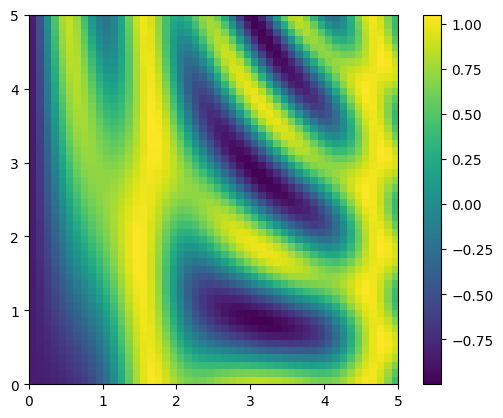

In [75]:
plt.imshow(  # pohopíš v lekci s vizualizací
    z,
    origin="lower",
    extent=[0, 5, 0, 5],
    cmap="viridis"
)
plt.colorbar()

<br>

##### **🧠 CVIČENÍ 🧠, procvič si BROADCASTING v NUMPY**

Máš zadaný počet prodeje produktu:

1. Převeď počet produktů na ceny (cena 1ks = 1_000) pomocí broadcastingu
2. vytvoř vektor o délce 4, který obsahuje procentuální marži každého produktu 10, 15, 20 a 25 %,
3. vypočti prodejní ceny produktů v tisících jednotek pomocí broadcastingu (zkontroluj rozměr)
4. spočítej celkové tržby pro každou marži pomocí broadcastingu.

In [128]:
pocet_prodeje_konkr_produktu = numpy.random.randint(10, 100, 50)

In [129]:
# 1. Převeď počet produktů na ceny (cena 1ks = 1_000) pomocí broadcastingu

In [131]:
# 2. Vytvoř vektor o délce 4, který obsahuje procentuální marži..
#    ..každého produktu 10, 15, 20 a 25 procent

In [141]:
# 3. Vypočti prodejní ceny produktů v tisících jednotek pomocí broadcastingu (zkontroluj rozměr)

In [139]:
# 4. Spočítej celkové tržby pro každou marži pomocí broadcastingu

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    import numpy

    pocet_prodeje_konkr_produktu = numpy.random.randint(10, 100, 50)
    
    # 1. Převeď počet produktů na ceny (cena 1ks = 1_000) pomocí broadcastingu
    cena_prodeje_konkr_produktu_ *= 1000
    
    # 2. Vytvoř vektor o délce 4, který obsahuje procentuální marži..
    #    ..každého produktu 10, 15, 20 a 25 procent
    marze = numpy.array([0.1, 0.15, 0.2, 0.25])
    
    # 3. Vypočti prodejní ceny produktů v tisících jednotek pomocí broadcastingu (zkontroluj rozměr)
    prodeje_reshaped = pocet_prodeje_konkr_produktu_tisice.reshape(-1, 1)
    marze_reshaped = marze.reshape(1, -1)
    prodejni_ceny = prodeje_reshaped * (1 + marze_reshaped)
    
    # 4. Spočítej celkové tržby pro každou marži pomocí broadcastingu
    celkove_trzby = numpy.sum(prodejni_ceny, axis=0)
    ```
</details>

## Třídění v NUMPY

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.QQOtOJPya2YEO6IkVBnYjQHaDV%26pid%3DApi&f=1&ipt=245c27df971ff24527ca317988f6feda8b14851ef0a889fda7d5a10d114dc5e6&ipo=images" width="300" style="margin-left:auto; margin-right:auto"/>

Třídit hodnoty v rámci sekvence opět můžeš provést pomocí built-in funkce `sum`:

In [169]:
nesetridene_pole = numpy.random.randint(1, 10, 7)

In [170]:
nesetridene_pole

array([4, 6, 9, 4, 7, 7, 8])

In [172]:
sorted(nesetridene_pole)

[4, 4, 6, 7, 7, 8, 9]

<br>

Pomocí funkce `numpy.sort` ale aplikuješ takové procesy, které poskytují efektivnější třídící algoritmus:

In [186]:
nesetridene_pole = numpy.array([2, 1, 3, 5, 4])

In [187]:
nesetridene_pole

array([2, 1, 3, 5, 4])

In [188]:
numpy.sort(nesetridene_pole)

array([1, 2, 3, 4, 5])

In [185]:
# help(numpy.sort)

<br>

Takto získáš pouze view, které nezmění původní zadávané a neseřazené hodnoty:

In [189]:
nesetridene_pole

array([2, 1, 3, 5, 4])

<br>

Pokud ale je tvým účelem, setřídit zadané hodnoty, můžeš provést *in-place* seřazení, pomocí metody `sort`:

In [190]:
nesetridene_pole.sort()

In [191]:
nesetridene_pole

array([1, 2, 3, 4, 5])

### Seřazené indexy

---

Pokud nepotřebuješ seřadit hodnoty, ale pouze získat pořadí podle indexů, můžeš vyzkoušet funkci `argsort`:

In [193]:
nesetridene_pole = numpy.array([2, 1, 3, 5, 4])

In [194]:
poradi_indexu = numpy.argsort(nesetridene_pole)

In [195]:
poradi_indexu

array([1, 0, 2, 4, 3])

<br>

Pomocí takového mezivýsledku můžeš následně přepsat pořadí pole:

In [196]:
nesetridene_pole

array([2, 1, 3, 5, 4])

In [197]:
nesetridene_pole[poradi_indexu]

array([1, 2, 3, 4, 5])

<br>

### Seřazení podle osy

---

In [198]:
matice_neserazena = numpy.random.randint(1, 10, size=(5, 5))

In [199]:
matice_neserazena

array([[2, 9, 1, 6, 3],
       [1, 3, 6, 1, 6],
       [9, 5, 3, 9, 4],
       [9, 3, 3, 7, 8],
       [1, 8, 4, 4, 4]])

<br>

Seřazení v závislosti na osách provádíš pomocí parametru `axis`:

In [200]:
numpy.sort(matice_neserazena, axis=0)  # Sloupcové řazení

array([[1, 3, 1, 1, 3],
       [1, 3, 3, 4, 4],
       [2, 5, 3, 6, 4],
       [9, 8, 4, 7, 6],
       [9, 9, 6, 9, 8]])

In [201]:
numpy.sort(matice_neserazena, axis=1)  # řádkové řazení

array([[1, 2, 3, 6, 9],
       [1, 1, 3, 6, 6],
       [3, 4, 5, 9, 9],
       [3, 3, 7, 8, 9],
       [1, 4, 4, 4, 8]])

<br>

Dávej si pozor, protože v takovém případě interpret uchopí každý sloupec nebo řádek jako oddělené pole.

Všechny související vztahy budou takovou úpravou ztracené.

<br>

### Partitionování

---

Někdy není záhodno třídit celé pole.

Stačí, pokud najdeš K nejmenších hodnot v poli.

K takovému účelu slouží funkce `numpy.partition`.

In [202]:
pole_neserazene = numpy.array([7, 6, 4, 1, 3, 2, 5])

In [203]:
pole_neserazene

array([7, 6, 4, 1, 3, 2, 5])

In [207]:
numpy.partition(pole_neserazene, 3)

array([1, 2, 3, 4, 5, 6, 7])

In [206]:
# help(numpy.partition)

## Strukturovaná pole v NUMPY

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.QQOtOJPya2YEO6IkVBnYjQHaDV%26pid%3DApi&f=1&ipt=245c27df971ff24527ca317988f6feda8b14851ef0a889fda7d5a10d114dc5e6&ipo=images" width="300" style="margin-left:auto; margin-right:auto"/>

Zatím jsi pracoval s homogenními poli.

Ne vždycky je tomu tak.

Pokud narazíš na heterogenní pole, můžeš často použít framework `pandas` a jeho `DataFrame`.

<br>

Máš třeba k dispozici několik kategorií údajů o řadě osob (řekněme jméno,
věk a hmotnost).

To lze uložit do tří samostatných polí:

In [80]:
jmeno = ["Marek", "Matouš", "Lukáš", "Jan"]
vek = [25, 35, 44, 17]
vaha = [65.5, 71.0, 75.0, 81.3]

Toto ale není úplně šťastná.

Nic v tomto zadání nenaznačuje, že hodnoty spolu jakkoliv souvisejí.

Proto bývá elegantním řešením použít strukturované pole:

In [76]:
data_osoby = numpy.zeros(
    4, dtype={
        "names": ("jmeno", "vek", "vaha"),
        "formats": ("U10", "i4", "f8")
    }
)

<br>

Je možné používat i datové typy pro `numpy` (nebo kombinovat):

In [143]:
data_osoby = numpy.zeros(
    4, dtype={
        "names": ("jmeno", "vek", "vaha"),
        "formats": ((numpy.str_,10), int, numpy.float32)
    }
)

In [144]:
data_osoby.dtype

dtype([('jmeno', '<U10'), ('vek', '<i8'), ('vaha', '<f4')])

<br>

Případně nastavit samotné typy jako string oddělený čárkami:

In [146]:
numpy.dtype("S10, i4, f8")

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

In [78]:
data_osoby.dtype

dtype([('jmeno', '<U10'), ('vek', '<i4'), ('vaha', '<f8')])

<br>

Zde platí:
- `U10` znamená *řetězec* *Unicode* **o maximální délce 10**",
- `i4` znamená  *4bajtové* (tj. 32bitové) **celé číslo**,
- `f8` znamená *8bajtový* (tj. 64bitový) **float**.

Nyní máš nachystané objekty a můžeš je naplnit hodnotami:

In [81]:
data_osoby["jmeno"] = jmeno
data_osoby["vek"] = vek
data_osoby["vaha"] = vaha

In [85]:
data_osoby

array([('Marek', 25, 65.5), ('Matouš', 35, 71. ), ('Lukáš', 44, 75. ),
       ('Jan', 17, 81.3)],
      dtype=[('jmeno', '<U10'), ('vek', '<i4'), ('vaha', '<f8')])

<br>

Tento proces má za následek, že data držíš konzistentně na jednom místě v paměti.

Dále k nim můžeš přistupovat několika způsoby:
1. pomocí **jména**,
2. pomocí **indexu**.

#### Pomocí jména

In [90]:
data_osoby["jmeno"]

array(['Marek', 'Matouš', 'Lukáš', 'Jan'], dtype='<U10')

#### Pomocí indexu

In [86]:
data_osoby[0]

('Marek', 25, 65.5)

In [87]:
data_osoby[-1]

('Jan', 17, 81.3)

### Použití boolean dotazování

---

Celý proces znáš z `pandas`:

##### Vyfiltruj mi osoby mladší 40 let

In [91]:
data_osoby[data_osoby["vek"] < 40]

array([('Marek', 25, 65.5), ('Matouš', 35, 71. ), ('Jan', 17, 81.3)],
      dtype=[('jmeno', '<U10'), ('vek', '<i4'), ('vaha', '<f8')])

<br>

##### Vyfiltruj mi osoby mladší 40 let a vrať pouze jejich jména

In [92]:
data_osoby[data_osoby["vek"] < 40]["jmeno"]

array(['Marek', 'Matouš', 'Jan'], dtype='<U10')

<br>

Pokud bude ale náročnost operací vzrůstat, je lepší, použít `pandas`.

<br>

##### **🧠 CVIČENÍ 🧠, procvič si BROADCASTING v NUMPY**

Máš data z e-shopu, která obsahují informace o objednávkách ve formě seznamu se slovníky.

Tvým úkolem je převést tato data do strukturovaného numpy pole a provést několik analýz:

1. Vytvoř ze zada'ného listu pole (opatrně na datový typ),
2. výpočet průměrné ceny objednávky a celkového počtu prodaných položek,
3. vyhledej index s největší cenou a vrať celé pole pomocí indexu,
4. vytvoření nového pole seřazeného podle nejvyššího počtu prodaných položek.

In [148]:
objednavky = [
    {"id": 1, "customer": "Jan Novák", "price": 1200, "items": 3},
    {"id": 2, "customer": "Petr Vondráček", "price": 650, "items": 1},
    {"id": 3, "customer": "Jana Dvořáková", "price": 1050, "items": 4},
    {"id": 4, "customer": "Lucie Macháčková", "price": 950, "items": 2},
    {"id": 5, "customer": "Tomáš Kučera", "price": 1800, "items": 6},
]

In [152]:
# 1. Vytvoř ze zadaného listu pole (opatrně na datový typ)

In [160]:
# 2. Výpočet průměrné ceny objednávky a celkového počtu prodaných položek

In [163]:
# 3. Vyhledej index s největší cenou a vrať celé pole pomocí indexu

In [168]:
# 4. Vytvoření nového pole seřazeného podle nejvyššího počtu prodaných položek

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    import numpy

    objednavky = [
    {"id": 1, "customer": "Jan Novák", "price": 1200, "items": 3},
    {"id": 2, "customer": "Petr Vondráček", "price": 650, "items": 1},
    {"id": 3, "customer": "Jana Dvořáková", "price": 1050, "items": 4},
    {"id": 4, "customer": "Lucie Macháčková", "price": 950, "items": 2},
    {"id": 5, "customer": "Tomáš Kučera", "price": 1800, "items": 6},
    ]
    
    # 1. Vytvoř ze zadaného listu pole (opatrně na datový typ)

    # Definice datového typu pro strukturované pole
    dtype = [("id", "int32"), ("customer", "U20"), ("price", "float32"), ("items", "int32")]

    # Převod seznamu slovníků na strukturované pole
    # Převod seznamu slovníků na seznam n-tic
    ntuples = [(o["id"], o["customer"], o["price"], o["items"]) for o in objednavky]

    # Převod seznamu n-tic na strukturované pole
    pole_objednavek = np.array(ntuples, dtype=dtype)
    
    # 2. Výpočet průměrné ceny objednávky a celkového počtu prodaných položek
    prumer_cena = numpy.mean(pole_objednavek["price"])
    celkem_prodano = numpy.sum(pole_objednavek["items"])
    
    # 3. Vyhledej index s největší cenou a vrať celé pole pomocí indexu
    max_index = numpy.argmax(pole_objednavek["price"])
    max_cena = pole_objednavek[max_index]
    
    # 4. Vytvoření nového pole seřazeného podle nejvyššího počtu prodaných položek
    serazene_objednavky = numpy.sort(pole_objednavek, order="items")[::-1]
    ```
</details>

---